In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Attendance distribution (S=2, M=8, N=101)

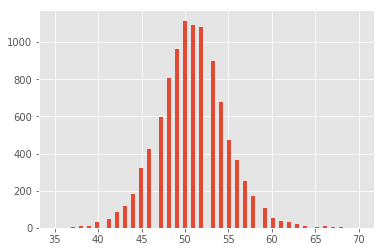

In [2]:
S = 2
M = 8
N_AGENTS = 101
N_ITERS = 10000
N_RUNS = 32

DIR = "results/m%d_s%d_nagents%d_niters%d_nruns%d/" % (M, S, N_AGENTS, N_ITERS, N_RUNS)

path = os.path.join(DIR, 'attendance_1.csv')

data = np.fromstring(open(path).read().strip(), sep=',').astype('int32')

plt.hist(data, bins='auto')
plt.show()

## Attendance standard deviations (S=2, various M, N = 101)

In [3]:
S = 2
N_AGENTS = 101
N_ITERS = 10000
N_RUNS = 32

x = []
y = []

for m in np.arange(1, 17):
    for r in np.arange(N_RUNS):
        DIR = "results/m%d_s%d_nagents%d_niters%d_nruns%d/" % (m, S, N_AGENTS, N_ITERS, N_RUNS)
        path = os.path.join(DIR, 'attendance_%d.csv' % (r + 1))
        data = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
        
        x.append(2**m / N_AGENTS)
        y.append(np.var(data) / N_AGENTS)

x = np.array(x)
y = np.array(y)

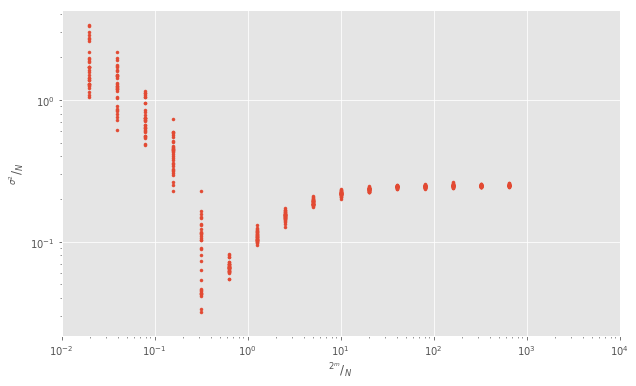

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(x=x, y=y, marker='.')

ax.set_xlabel(r'$^{2^m}/_N$')
ax.set_ylabel(r'$^{\sigma^2}/_N$')

ax.set_xlim(0.01, 10000)
ax.set(xscale='log', yscale='log')

plt.show()

## Attendance standard deviations (S=2, various M, various N)

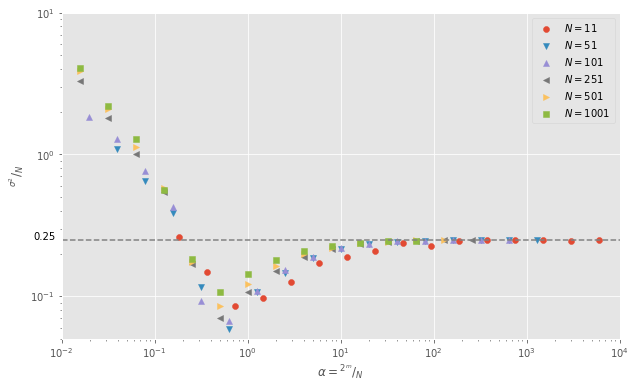

In [5]:
S = 2
N_ITERS = 10000
N_RUNS = 32
MIN_M = 1
MAX_M = 16

markers = ['o', 'v', '^', '<', '>', 's']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i, n in enumerate([11, 51, 101, 251, 501, 1001]):
    x = []
    y = []
    for m in np.arange(MIN_M, MAX_M + 1):
        _y = []
        for r in np.arange(N_RUNS):
            dr = "results/m%d_s%d_nagents%d_niters%d_nruns%d/" % (m, S, n, N_ITERS, N_RUNS)
            path = os.path.join(dr, 'attendance_%d.csv' % (r + 1))
            data = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
            
            _y.append(np.var(data) / n)
        
        x.append(2**m / n)
        y.append(np.mean(_y))
    
    x = np.array(x)
    y = np.array(y)
    
    ax.scatter(x, y, marker=markers[i], label=r'$N=%d$'%n)

ax.axhline(y=0.25, color='grey', linestyle='--')
ax.text(0.005, 0.25, '0.25')

ax.set_xlabel(r'$\alpha = ^{2^m}/_N$')
ax.set_ylabel(r'$^{\sigma^2}/_N$')

ax.set_xlim(0.01, 10000)
ax.set_ylim(0.05, 10)
ax.set(xscale='log', yscale='log')

ax.legend()
plt.show()